# Simulation with Kelly criteria

In this script, I am simulation the possible outcomes of betting with the Kelly criteria. We assume that the probability of winning a game is given by the inverse of the median of the odds ($1/o_m$), while the payoff of single bet is given by the optimal odds ($o^*$).

The optimal fraction of the capital to bet, is given by:

$$
f^* = \frac{o^*\cdot 0.95 - o_m}{(o^*\cdot 0.95 - 1) \cdot o_m}
$$

where we assume that $5\%$ of each win goes back in taxes.

In [238]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class Kelly():
    def __init__(self, initial_capital, optimal_odds, average_odds, fee, kelly_fraction):
        self.initial_capital = initial_capital
        self.optimal_odds = optimal_odds
        self.average_odds = average_odds
        self.fee = fee
        self.kelly_fraction = kelly_fraction
        # compute optimal fraction of capital to be invested
        self.f = (self.optimal_odds*(1 - self.fee) - self.average_odds)/((self.optimal_odds*(1 - self.fee) - 1)*self.average_odds)
        self.f = self.f*self.kelly_fraction
        
    def get_outcome(self):
        return 1 if np.random.uniform() < 1./self.average_odds else 0
    
    def simulate_path(self, steps):
        path = [self.initial_capital]
        for step in range(steps):
            win = self.get_outcome()
            bet = path[-1]*self.f
            outcome = path[-1] - path[-1]*self.f + win*(bet*self.optimal_odds*(1 - self.fee)) 
            path.append(outcome)
        return path
    
    def run_simulation(self, simulations, steps):
        simulated_paths = []
        for i in range(simulations):
            simulated_paths.append(kelly.simulate_path(steps))
        simulated_paths = np.array(simulated_paths)
        #averages = simulated_paths.mean(axis=0)
        averages = np.median(simulated_paths, axis=0)
        # plot results
        for i in range(simulations):
            plt.plot(range(steps+1), simulated_paths[i,:], c='b', alpha=.02)
        plt.plot(range(steps+1), averages, c='r')
        plt.ylim([0, self.initial_capital*1000])
        plt.show()
        # compute average return per invested 
        print "Average return: {}".format(np.mean(np.diff(averages)/averages[:-1]))
        return simulated_paths
    

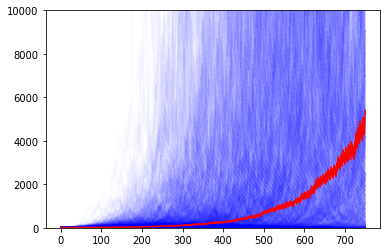

Average return: 0.0162006991338


In [241]:
initial_capital = 10
optimal_odds = 1.92
average_odds = 1.71
fee = 0.0
kelly_fraction = 1

kelly= Kelly(initial_capital, optimal_odds, average_odds, fee, kelly_fraction)
simulated_paths = kelly.run_simulation(1000,750)

In [232]:
averages = np.median(simulated_paths, axis=0)

0.016046608920273292